In [1]:
import os
from json import dumps
import logging
import pandas as pd
import numpy as np
import math
import json
from tqdm.notebook import tqdm
import copy

from scipy.stats import hypergeom as hg

import matplotlib.pyplot as plt
from matplotlib import cm

#from scipy.stats import hypergeom as hg
import statsmodels.stats as sts

import glob

from bokeh.plotting import figure, output_file, show
from bokeh.palettes import plasma, turbo# select a palette
import itertools# itertools handles the cycling

In [2]:
data_directory = "/Users/swarnavo/CodeX/CoRe/Examples/collective_action"
os.chdir(data_directory)

all_datafiles = glob.glob('maxEnt-q_data*.csv')

print(all_datafiles)

top_GOBPs = pd.read_csv('collectively_activated_GOBPs.csv')

['maxEnt-q_data1000.csv', 'maxEnt-q_data100000.csv', 'maxEnt-q_data50.csv', 'maxEnt-q_data20.csv', 'maxEnt-q_data5000.csv', 'maxEnt-q_data20000.csv', 'maxEnt-q_data500.csv', 'maxEnt-q_data10.csv', 'maxEnt-q_data100.csv', 'maxEnt-q_data2000.csv', 'maxEnt-q_data10000.csv', 'maxEnt-q_data1000000.csv', 'maxEnt-q_data200.csv']


In [3]:
all_data = {}

for f in all_datafiles:
    tag = f.split('.')[0].split('data')[1]
    all_data[int(tag)] = pd.read_csv(f)

In [4]:
selected_indices = []

GOBP_list = all_data[10]['GOBP'].to_list()

for gobp in top_GOBPs['go_names']:
    selected_indices.append(GOBP_list.index(gobp))

In [5]:
selected_indices.sort()

In [6]:
output_q = np.ones(shape=(len(selected_indices),len(all_datafiles)))

In [7]:
tags = sorted(list(all_data.keys()))

In [8]:
for i in range(0,output_q.shape[1]):
    print(tags[i])
    output_q[:,i] = all_data[tags[i]].iloc[selected_indices]['Collective_action'].to_numpy()
    #output_q[:,i][output_q[:,i] == 0] = 1.0
    
    #print(all_data[tags[i]]['Collective_action'])
    
    #output_q[:,i][output_q[:,i] < 1e-20] = 1e-20

10
20
50
100
200
500
1000
2000
5000
10000
20000
100000
1000000


In [9]:
sorted_GOBP_list = top_GOBPs['go_names'].to_list()

print(len(top_GOBPs['go_names'].to_list()),output_q.shape)

173 (173, 13)


In [10]:
tmp = sorted(zip(top_GOBPs['go_names'].to_list(), output_q[:,-1]),key=lambda x: x[1])
sorted_GOBP_list = [x[0] for x in tmp]

In [11]:
output_q = output_q[output_q[:,-1].argsort()]

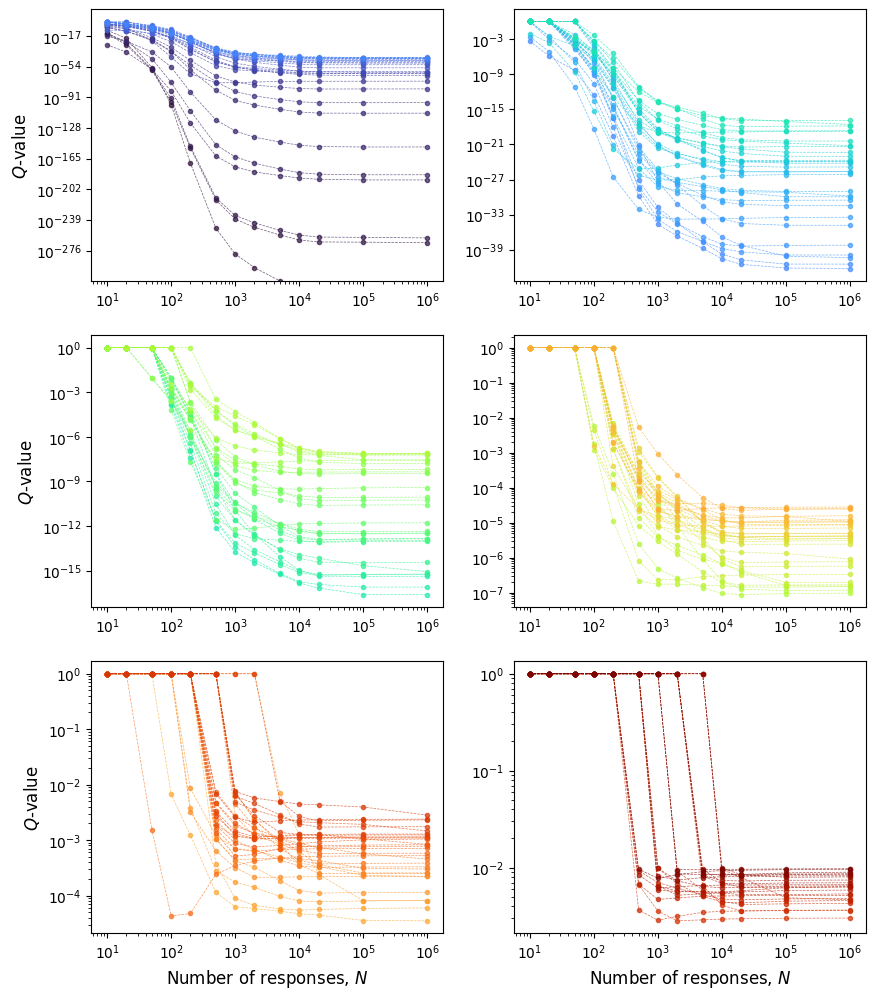

<Figure size 640x480 with 0 Axes>

In [23]:
colors = itertools.cycle(turbo(len(sorted_GOBP_list)))

fig, axs = plt.subplots(figsize=(10,12),nrows=3,ncols=2)

legendFig = plt.figure("Legend plot")

all_figs = []

for i in range(0,30):
    #plt.plot(tags,output_q[-(i+1),:],label=sorted_GOBP_list[-(i+1)],color=next(colors))
    f = axs[0,0].plot(tags,output_q[i,:],label=sorted_GOBP_list[i],color=next(colors),ls='--',lw=0.5,ms=3,marker='o',alpha=0.7)
    
    all_figs.append(f)
    
axs[0,0].set_xscale('log')
axs[0,0].set_yscale('log')
axs[0,0].set_ylabel(r'$Q$-value',fontsize=12)
    
for i in range(30,60):
    #plt.plot(tags,output_q[-(i+1),:],label=sorted_GOBP_list[-(i+1)],color=next(colors))
    f = axs[0,1].plot(tags,output_q[i,:],label=sorted_GOBP_list[i],color=next(colors),ls='--',lw=0.5,ms=3,marker='o',alpha=0.7)

    all_figs.append(f)
    
axs[0,1].set_xscale('log')
axs[0,1].set_yscale('log')

for i in range(60,90):
    #plt.plot(tags,output_q[-(i+1),:],label=sorted_GOBP_list[-(i+1)],color=next(colors))
    f = axs[1,0].plot(tags,output_q[i,:],label=sorted_GOBP_list[i],color=next(colors),ls='--',lw=0.5,ms=3,marker='o',alpha=0.7)
    
    all_figs.append(f)
    
axs[1,0].set_xscale('log')
axs[1,0].set_yscale('log')
axs[1,0].set_ylabel(r'$Q$-value',fontsize=12)
#axs[1,0].set_xlabel(r'Number of responses, $N$',fontsize=12)

for i in range(90,120):
    #plt.plot(tags,output_q[-(i+1),:],label=sorted_GOBP_list[-(i+1)],color=next(colors))
    f = axs[1,1].plot(tags,output_q[i,:],label=sorted_GOBP_list[i],color=next(colors),ls='--',lw=0.5,ms=3,marker='o',alpha=0.7)
    
    all_figs.append(f)
    
axs[1,1].set_xscale('log')
axs[1,1].set_yscale('log')
#axs[1,1].set_ylabel(r'$Q$-value',fontsize=12)
#axs[1,1].set_xlabel(r'Number of responses, $N$',fontsize=12)

for i in range(120,150):
    #plt.plot(tags,output_q[-(i+1),:],label=sorted_GOBP_list[-(i+1)],color=next(colors))
    f = axs[2,0].plot(tags,output_q[i,:],label=sorted_GOBP_list[i],color=next(colors),ls='--',lw=0.5,ms=3,marker='o',alpha=0.7)
    
    all_figs.append(f)
axs[2,0].set_xscale('log')
axs[2,0].set_yscale('log')
axs[2,0].set_ylabel(r'$Q$-value',fontsize=12)
axs[2,0].set_xlabel(r'Number of responses, $N$',fontsize=12)

for i in range(150,len(sorted_GOBP_list)):
    #plt.plot(tags,output_q[-(i+1),:],label=sorted_GOBP_list[-(i+1)],color=next(colors))
    f = axs[2,1].plot(tags,output_q[i,:],label=sorted_GOBP_list[i],color=next(colors),ls='--',lw=0.5,ms=3,marker='o',alpha=0.7)
    
    all_figs.append(f)
    
axs[2,1].set_xscale('log')
axs[2,1].set_yscale('log')
axs[2,1].set_xlabel(r'Number of responses, $N$',fontsize=12)
    
#plt.xscale('log')
#plt.yscale('log')

#plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)

#plt.xlabel(r'Number of responses, $N$',fontsize=18)
#plt.ylabel(r'$Q$-value',fontsize=18)

#plt.legend(axs)

#plt.xlim(7,10000)
#plt.ylim(1e-100,2)

#fig.legend(loc=(0,-6.9))

#plt.tight_layout()

fig.savefig('collectiveQ-N6.png',dpi=300)

In [25]:
legendFig.legend(all_figs, loc='center')
legendFig.savefig('legend.png')

In [ ]:
colors = itertools.cycle(turbo(len(sorted_GOBP_list)))

fig, axs = plt.subplots(figsize=(10,8),nrows=2,ncols=2)

for i in range(0,50):
    #plt.plot(tags,output_q[-(i+1),:],label=sorted_GOBP_list[-(i+1)],color=next(colors))
    axs[0,0].plot(tags,output_q[i,:],label=sorted_GOBP_list[i],color=next(colors),ls='--',lw=0.5,ms=3,marker='o',alpha=0.7)

axs[0,0].set_xscale('log')
axs[0,0].set_yscale('log')
axs[0,0].set_ylabel(r'$Q$-value',fontsize=12)
    
for i in range(50,100):
    #plt.plot(tags,output_q[-(i+1),:],label=sorted_GOBP_list[-(i+1)],color=next(colors))
    axs[0,1].plot(tags,output_q[i,:],label=sorted_GOBP_list[i],color=next(colors),ls='--',lw=0.5,ms=3,marker='o',alpha=0.7)

axs[0,1].set_xscale('log')
axs[0,1].set_yscale('log')

for i in range(100,150):
    #plt.plot(tags,output_q[-(i+1),:],label=sorted_GOBP_list[-(i+1)],color=next(colors))
    axs[1,0].plot(tags,output_q[i,:],label=sorted_GOBP_list[i],color=next(colors),ls='--',lw=0.5,ms=3,marker='o',alpha=0.7)

axs[1,0].set_xscale('log')
axs[1,0].set_yscale('log')
axs[1,0].set_ylabel(r'$Q$-value',fontsize=12)
axs[1,0].set_xlabel(r'Number of responses, $N$',fontsize=12)

for i in range(150,len(sorted_GOBP_list)):
    #plt.plot(tags,output_q[-(i+1),:],label=sorted_GOBP_list[-(i+1)],color=next(colors))
    axs[1,1].plot(tags,output_q[i,:],label=sorted_GOBP_list[i],color=next(colors),ls='--',lw=0.5,ms=3,marker='o',alpha=0.7)

axs[1,1].set_xscale('log')
axs[1,1].set_yscale('log')
axs[1,1].set_xlabel(r'Number of responses, $N$',fontsize=12)
    
#plt.xscale('log')
#plt.yscale('log')

#plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)

#plt.xlabel(r'Number of responses, $N$',fontsize=18)
#plt.ylabel(r'$Q$-value',fontsize=18)

#plt.legend()

#plt.xlim(7,10000)
#plt.ylim(1e-100,2)

#plt.legend(loc=(0,-6.9))

plt.savefig('collectiveQ-N.png',dpi=400)

In [ ]:
all_communicated_proteins = pd.read_csv('collectively_communicated_proteins.csv')

In [ ]:
print(list(all_communicated_proteins))

In [ ]:
plt.hist(np.log10(all_communicated_proteins['Relative entropy (bits)'].to_numpy()),bins='rice')
plt.ylabel('Frequency',fontsize=18)
plt.xlabel('$\log_{10} H_{\mathrm{ref}}(v_i)$',fontsize=18)